In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')
print(강서_대여소_ID)

      대여소_ID
0     ST-975
1     ST-837
2     ST-836
3     ST-835
4     ST-834
..       ...
219  ST-1066
220  ST-1065
221  ST-1064
222  ST-1063
223  ST-1062

[224 rows x 1 columns]


In [67]:
강서_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
print(강서_데이터)

              기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리
0        2023-12-25       0   ST-1718   ST-2047      1        7      1363
1        2023-12-25       0   ST-2040   ST-1351      1        5       756
2        2023-12-25       0    ST-528    ST-518      1       14      2086
3        2023-12-25       0   ST-2031   ST-2965      1        9      1578
4        2023-12-25       0    ST-829   ST-2054      1       34      2680
...             ...     ...       ...       ...    ...      ...       ...
1772057  2024-01-16    2345    ST-525   ST-2481      1        3       600
1772058  2024-01-16    2345    ST-834    ST-528      1       11      2267
1772059  2024-01-16    2350   ST-1352   ST-1676      1        6       845
1772060  2024-01-16    2350   ST-2994    ST-517      1        3       448
1772061  2024-01-16    2350    ST-513   ST-2482      1        3       710

[1772062 rows x 7 columns]


In [68]:
print(강서_데이터.info())
print(강서_대여소_ID.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772062 entries, 0 to 1772061
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   기준_날짜      object
 1   기준_시간대     int64 
 2   시작_대여소_ID  object
 3   종료_대여소_ID  object
 4   전체_건수      int64 
 5   전체_이용_분    int64 
 6   전체_이용_거리   int64 
dtypes: int64(4), object(3)
memory usage: 94.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여소_ID  224 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB
None


In [69]:
import matplotlib.pyplot as plt

# 시작 대여소별 전체 횟수 계산(1년 동안 해당 대여소에서 대여한 총량)
시작대여소별_전체횟수 = 강서_데이터.groupby('시작_대여소_ID')['전체_건수'].sum()

# 종료 대여소별 전체 횟수 계산(1년 동안 해당 대여소에서 반납한 총량)
종료대여소별_전체횟수 = 강서_데이터.groupby('종료_대여소_ID')['전체_건수'].sum()

In [70]:
# 강서구에 위치한 대여소 ID 리스트업
len(강서_데이터['시작_대여소_ID'].unique())

195

In [71]:
# 강서구_대여소_ID_list == '강서구에 위치한 대여소 ID 리스트'로 변수 지정
강서_대여소_ID_list= 강서_데이터['시작_대여소_ID'].unique()
print(강서_대여소_ID_list)
print(len(강서_대여소_ID_list))

['ST-1718' 'ST-2040' 'ST-528' 'ST-2031' 'ST-829' 'ST-2993' 'ST-2037'
 'ST-2871' 'ST-2045' 'ST-1402' 'ST-1065' 'ST-2036' 'ST-516' 'ST-2033'
 'ST-535' 'ST-2052' 'ST-1250' 'ST-831' 'ST-1251' 'ST-522' 'ST-2024'
 'ST-512' 'ST-508' 'ST-2490' 'ST-2050' 'ST-1254' 'ST-1694' 'ST-2487'
 'ST-2041' 'ST-1506' 'ST-1688' 'ST-2482' 'ST-2056' 'ST-1727' 'ST-1249'
 'ST-1062' 'ST-2888' 'ST-2476' 'ST-1709' 'ST-2491' 'ST-525' 'ST-2035'
 'ST-2046' 'ST-3100' 'ST-538' 'ST-1647' 'ST-835' 'ST-1676' 'ST-2558'
 'ST-2023' 'ST-519' 'ST-517' 'ST-2557' 'ST-3125' 'ST-1517' 'ST-2027'
 'ST-824' 'ST-834' 'ST-2483' 'ST-2992' 'ST-1512' 'ST-2047' 'ST-2539'
 'ST-1351' 'ST-2018' 'ST-2026' 'ST-513' 'ST-2752' 'ST-2538' 'ST-2858'
 'ST-1689' 'ST-523' 'ST-2477' 'ST-518' 'ST-1714' 'ST-3084' 'ST-2550'
 'ST-2886' 'ST-1352' 'ST-3118' 'ST-2028' 'ST-2025' 'ST-1645' 'ST-2887'
 'ST-2611' 'ST-2569' 'ST-3281' 'ST-2943' 'ST-2883' 'ST-2789' 'ST-1695'
 'ST-2556' 'ST-2613' 'ST-1509' 'ST-2965' 'ST-510' 'ST-1519' 'ST-2419'
 'ST-2484' 'ST-2945' 'ST-

In [72]:
# 대여소 ID를 인덱스로 가지는 시작횟수 리스트 생성
temp_list = []

for i in range(len(강서_대여소_ID_list)):
    temp_list.append(시작대여소별_전체횟수[강서_대여소_ID_list[i]])
    
print(temp_list)

[48314, 15990, 9236, 70582, 6274, 15543, 24529, 26339, 45216, 8271, 39881, 15627, 14212, 23552, 2303, 10766, 3411, 12772, 27159, 20998, 15884, 11043, 12929, 6229, 15685, 15112, 7470, 16108, 9715, 10631, 16266, 13759, 17727, 9372, 20418, 14123, 12371, 3412, 12889, 10634, 9677, 19152, 10355, 7424, 5681, 5577, 19074, 4665, 4839, 9360, 5265, 6581, 24597, 5131, 13812, 5203, 15304, 18972, 5597, 6111, 7147, 12951, 1364, 21160, 3829, 5158, 21318, 3362, 12163, 11251, 16503, 9038, 7550, 6986, 11447, 13920, 9508, 8828, 17651, 3325, 3399, 4640, 16066, 2295, 9015, 10387, 221, 11983, 7598, 7925, 1307, 2783, 7433, 8371, 12608, 7130, 15884, 8544, 2188, 11025, 12654, 16316, 7692, 5142, 10097, 5420, 2503, 2194, 7205, 22753, 9533, 7073, 14682, 6338, 6513, 21467, 13657, 8871, 9600, 9453, 2418, 11425, 7782, 3166, 7914, 10020, 10183, 3535, 2518, 15031, 6826, 8815, 2175, 9344, 6543, 15009, 11067, 1928, 14910, 8080, 5228, 4482, 10903, 6717, 11270, 4765, 4772, 7989, 5305, 19946, 6662, 8654, 7069, 664, 6187, 11

In [73]:
# start_count == 대여소 ID를 인덱스로 가지는 시작횟수 리스트로 시리즈 변수 생성
start_count = temp_list.copy()

In [74]:
# 대여소 ID를 인덱스로 가지는 종료횟수 리스트 생성
temp_list2 = []

for i in range(len(강서_대여소_ID_list)):
    temp_list2.append(종료대여소별_전체횟수[강서_대여소_ID_list[i]])
    
print(temp_list2)

[46840, 16924, 9678, 71066, 5608, 15477, 24655, 26067, 45064, 8199, 40238, 15613, 16068, 27644, 2320, 10738, 3281, 12399, 26971, 20905, 16036, 11090, 13272, 6284, 16361, 15349, 5257, 15600, 8610, 10667, 16598, 13543, 17635, 9532, 20565, 14993, 12702, 2638, 11904, 10266, 9789, 23095, 10827, 6621, 5153, 5789, 20177, 4808, 3439, 9156, 5286, 6455, 24551, 4948, 14013, 6478, 16157, 19233, 5481, 5163, 4985, 13136, 961, 21181, 2719, 4693, 21428, 2520, 11961, 7878, 15388, 5682, 6864, 6817, 11354, 14014, 10321, 8683, 17685, 3886, 1127, 4547, 16639, 3062, 8386, 10595, 200, 12150, 8312, 8014, 1302, 2810, 7614, 9193, 12785, 7339, 15763, 7990, 2362, 13153, 13138, 15583, 7370, 5401, 10281, 5490, 2701, 1974, 7253, 23091, 7379, 7294, 15052, 5981, 8149, 24337, 14149, 8754, 9800, 8304, 2493, 10188, 7645, 3103, 7609, 10055, 9525, 4133, 2724, 14413, 5763, 8250, 2377, 9027, 6416, 15549, 10948, 1606, 16421, 8122, 4807, 4572, 10776, 6608, 11012, 4641, 4374, 7968, 5232, 19954, 6495, 7815, 6864, 736, 5062, 1153

In [75]:
# end_count == 대여소 ID를 인덱스로 가지는 종료횟수 리스트로 시리즈 변수 생성
end_count = temp_list2.copy()

In [76]:
# 강서_대여소_정보 DataFrame 생성
# column = ['대여소_ID', '대여건수', '반납건수']
강서_대여소_정보 = {'대여소_ID' : 강서_대여소_ID_list, '대여건수' : start_count, '반납건수' : end_count}
강서_대여소_정보 = pd.DataFrame(강서_대여소_정보)

강서_대여소_정보

,대여소_ID,대여건수,반납건수
0,ST-1718,48314,46840
1,ST-2040,15990,16924
2,ST-528,9236,9678
3,ST-2031,70582,71066
4,ST-829,6274,5608
...,...,...,...
190,ST-1711,2832,3650
191,ST-3031,5174,4993
192,ST-2032,3466,3564
193,ST-1252,2035,1523


In [77]:
# '대여-반납' column 생성 >> 쏠림 현상 유무 확인 기준 지표
강서_대여소_정보['대여-반납'] = 강서_대여소_정보['대여건수'] - 강서_대여소_정보['반납건수']

In [78]:
강서_대여소_정보

,대여소_ID,대여건수,반납건수,대여-반납
0,ST-1718,48314,46840,1474
1,ST-2040,15990,16924,-934
2,ST-528,9236,9678,-442
3,ST-2031,70582,71066,-484
4,ST-829,6274,5608,666
...,...,...,...,...
190,ST-1711,2832,3650,-818
191,ST-3031,5174,4993,181
192,ST-2032,3466,3564,-98
193,ST-1252,2035,1523,512


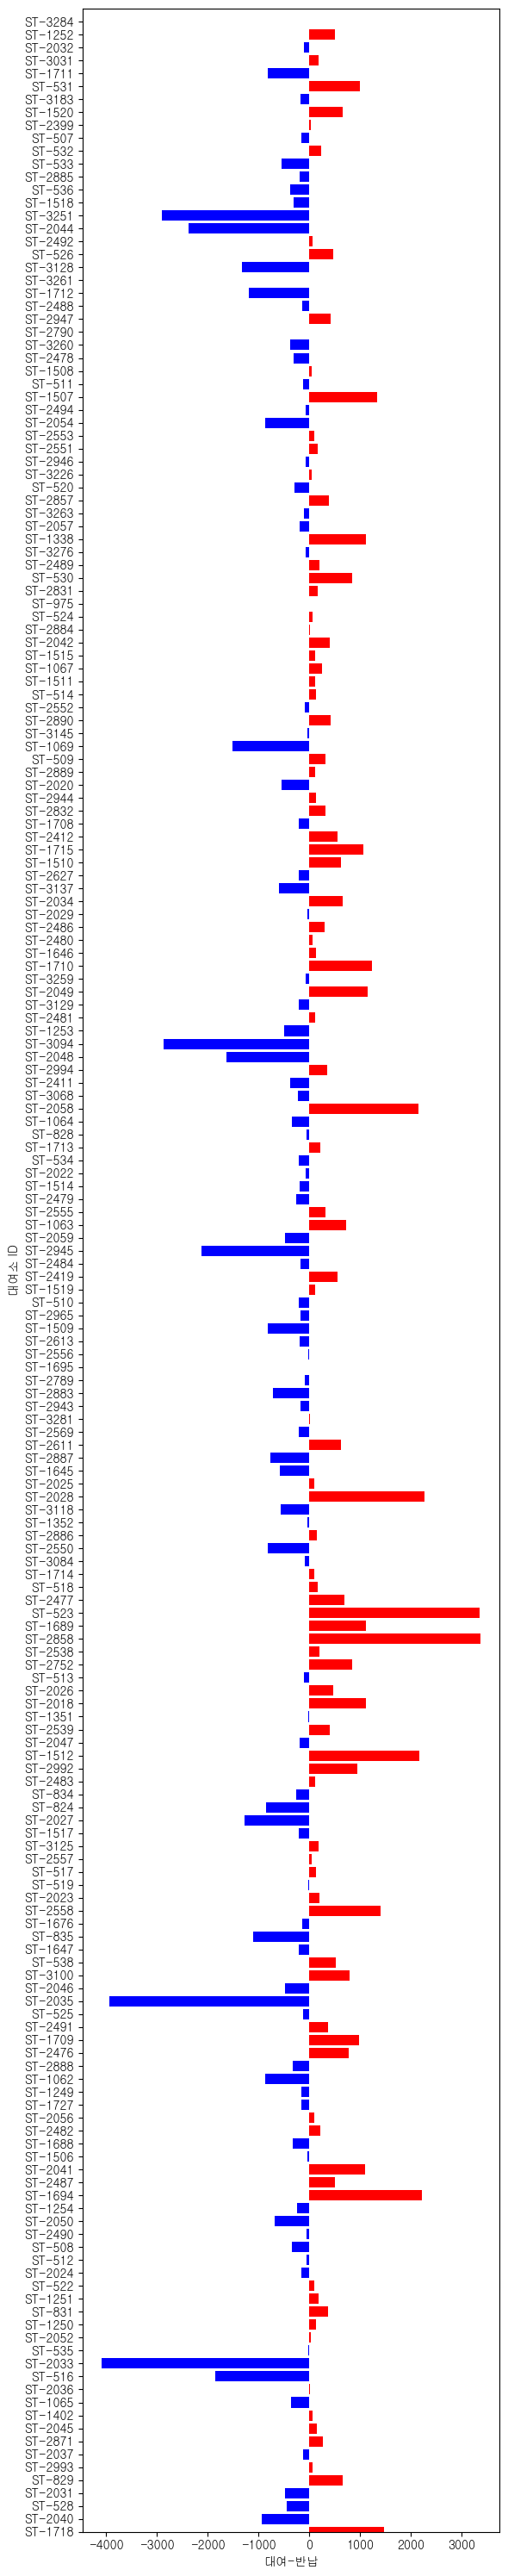

In [79]:
import matplotlib.font_manager as fm

colors = ['red' if val > 0 else 'blue' for val in 강서_대여소_정보['대여-반납']]

fig, ax = plt.subplots(figsize=(6,30))

plt.barh(강서_대여소_정보['대여소_ID'], 강서_대여소_정보['대여-반납'], color = colors)
# plt.xticks(rotation=90)
plt.ylabel('대여소 ID')
plt.xlabel('대여-반납')
plt.ylim(0, 195)


plt.tight_layout()
plt.show()

In [28]:
강서_대여소_정보.to_csv('강서_대여소_정보.csv')

In [53]:
# '대여-반납'의 절대값으로 기준 설정 1000 이상
condition1000 = 강서_대여소_정보['대여-반납'].abs() > 1000

In [54]:
temp1000 = 강서_대여소_정보[condition1000]

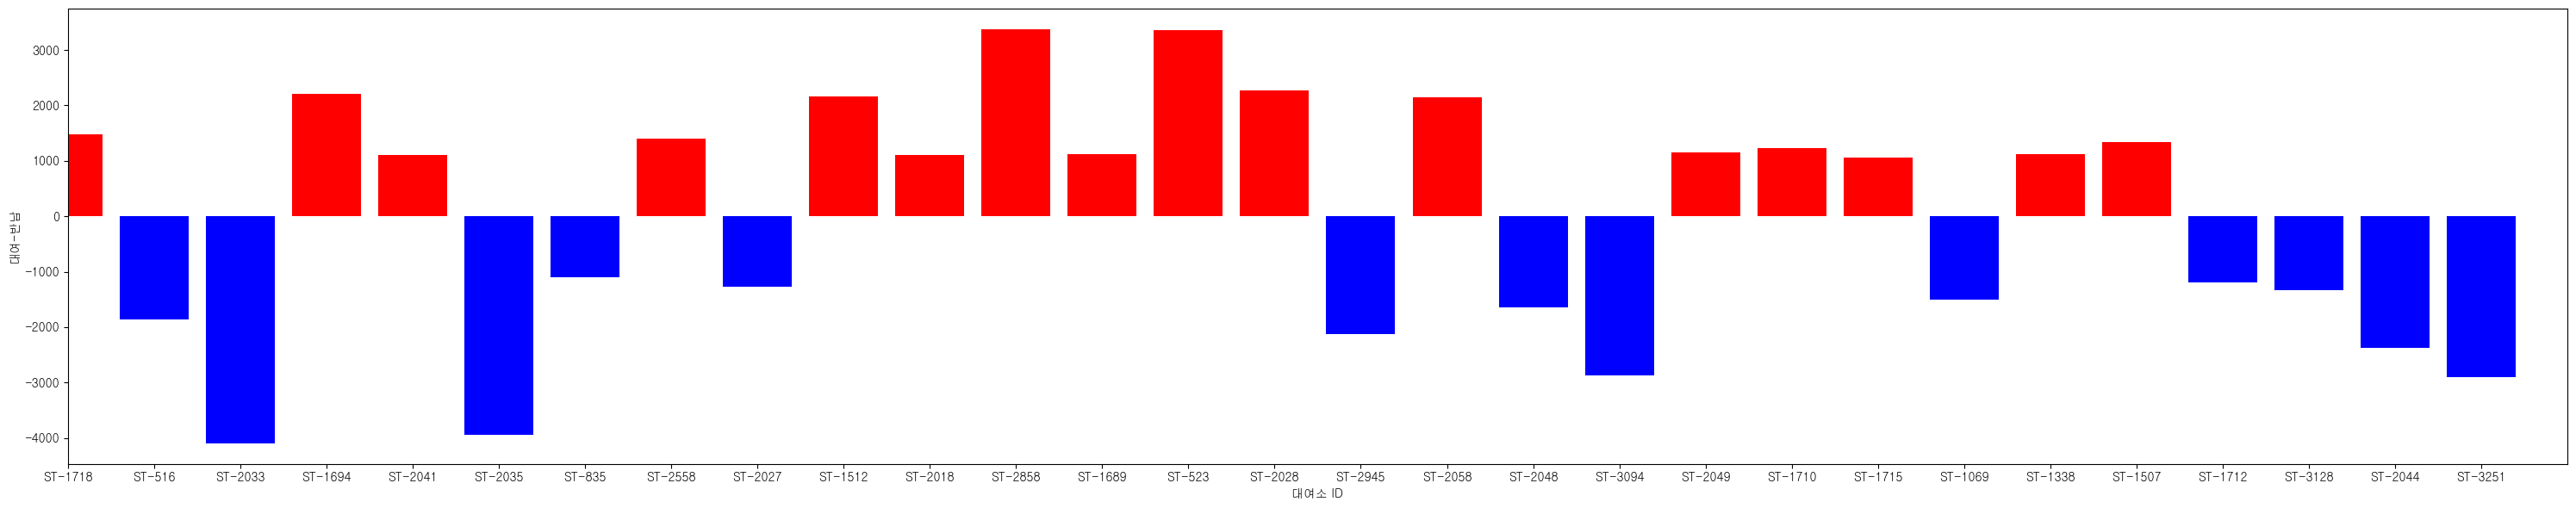

In [80]:
# '대여-반납'이 양수면 red >> 대여가 많은 곳
# '대여-반납'이 음수면 blue >> 반납이 많은 곳
colors = ['red' if val > 0 else 'blue' for val in temp1000['대여-반납']]

fig, ax = plt.subplots(figsize=(30,6))

plt.bar(temp1000['대여소_ID'], temp1000['대여-반납'], color = colors)
# plt.xticks(rotation=90)
plt.xlabel('대여소 ID')
plt.ylabel('대여-반납')
plt.xlim(0, len(temp1000))


plt.tight_layout()
plt.show()


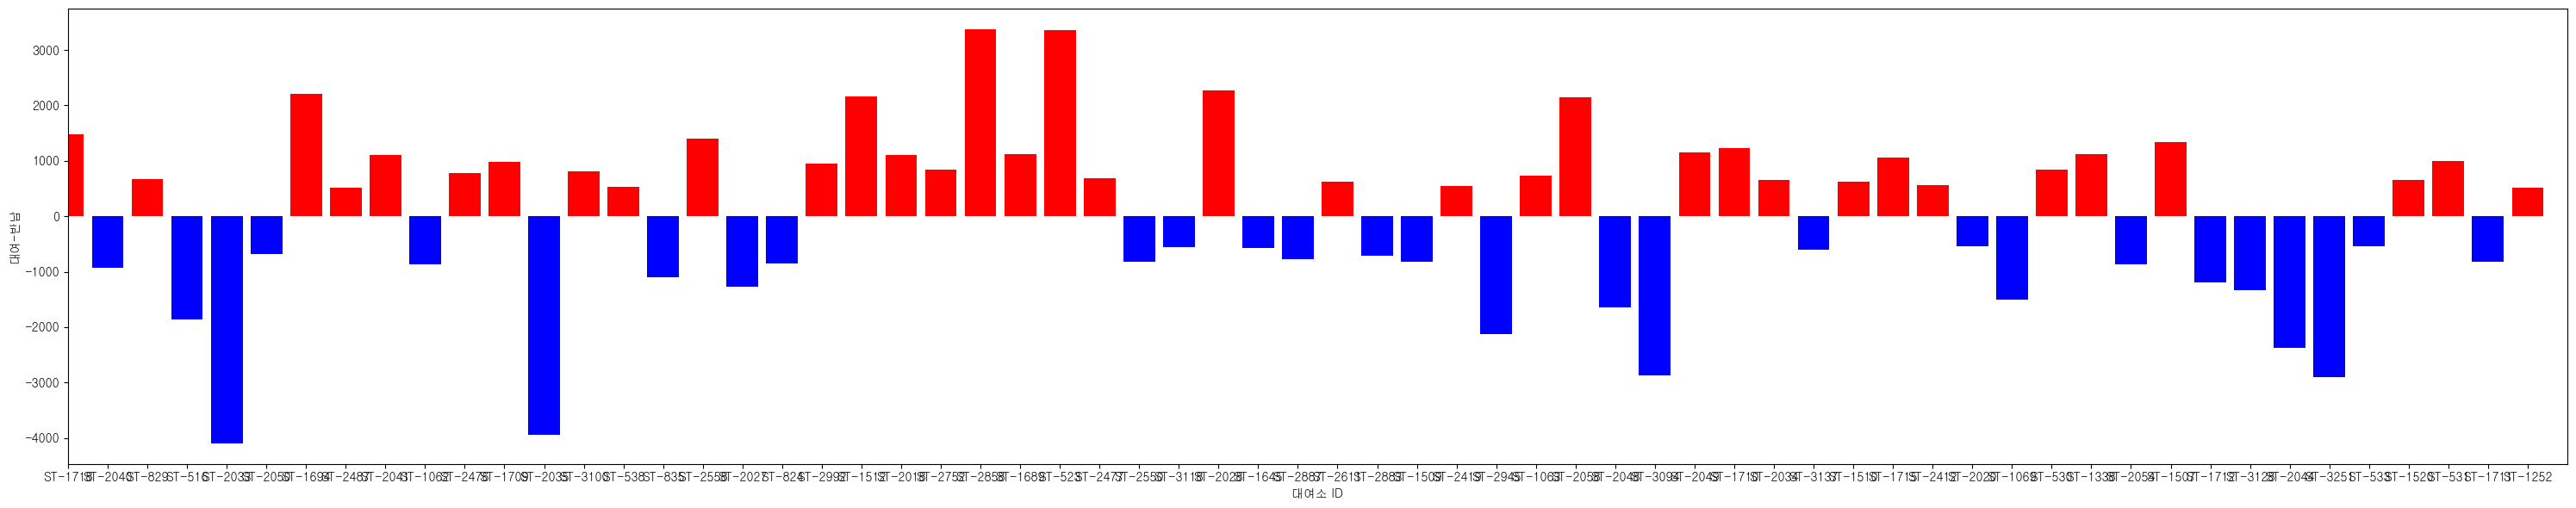

In [81]:
# '대여-반납'의 절대값으로 기준 설정 500 이상
condition500 = 강서_대여소_정보['대여-반납'].abs() > 500

temp500 = 강서_대여소_정보[condition500]

colors = ['red' if val > 0 else 'blue' for val in temp500['대여-반납']]

fig, ax = plt.subplots(figsize=(30,6))

plt.bar(temp500['대여소_ID'], temp500['대여-반납'], color = colors)
# plt.xticks(rotation=90)
plt.xlabel('대여소 ID')
plt.ylabel('대여-반납')
plt.xlim(0, len(temp500))


plt.tight_layout()
plt.show()

# 나눔글꼴 경로 설정
font_path = '../../Data/NanumGothic.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)

In [61]:
# 각 조건별 선별 대여소 수
print(len(temp1000))
print(len(temp500))

29
63


In [65]:
강서_대여소_정보[condition1000]

,대여소_ID,대여건수,반납건수,대여-반납
0,ST-1718,48314,46840,1474
12,ST-516,14212,16068,-1856
13,ST-2033,23552,27644,-4092
26,ST-1694,7470,5257,2213
28,ST-2041,9715,8610,1105
41,ST-2035,19152,23095,-3943
46,ST-835,19074,20177,-1103
48,ST-2558,4839,3439,1400
55,ST-2027,5203,6478,-1275
60,ST-1512,7147,4985,2162
